In [1]:
#importing library
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sf

In [2]:
#importing Metrics
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve, auc

In [3]:
df = pd.read_csv('Bank.csv')

In [4]:
df

,step,customer,age,gender,zipcodeOri,merchant,zipMerchant,category,amount,fraud
0,0,'C1093826151','4','M','28007','M348934600','28007','es_transportation',4.55,0
1,0,'C352968107','2','M','28007','M348934600','28007','es_transportation',39.68,0
2,0,'C2054744914','4','F','28007','M1823072687','28007','es_transportation',26.89,0
3,0,'C1760612790','3','M','28007','M348934600','28007','es_transportation',17.25,0
4,0,'C757503768','5','M','28007','M348934600','28007','es_transportation',35.72,0
...,...,...,...,...,...,...,...,...,...,...
594638,179,'C1753498738','3','F','28007','M1823072687','28007','es_transportation',20.53,0
594639,179,'C650108285','4','F','28007','M1823072687','28007','es_transportation',50.73,0
594640,179,'C123623130','2','F','28007','M349281107','28007','es_fashion',22.44,0
594641,179,'C1499363341','5','M','28007','M1823072687','28007','es_transportation',14.46,0


In [5]:
df.shape

(594643, 10)

In [6]:
df.isnull().sum()

step           0
customer       0
age            0
gender         0
zipcodeOri     0
merchant       0
zipMerchant    0
category       0
amount         0
fraud          0
dtype: int64

In [7]:
df['fraud'].value_counts()

0    587443
1      7200
Name: fraud, dtype: int64

In [8]:
df_fraud = df.loc[df.fraud == 1] 
df_non_fraud = df.loc[df.fraud == 0]

C:\Users\Asus\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


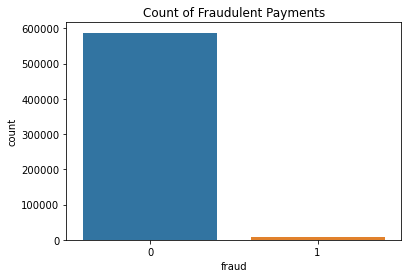

Number of normal examples:  587443
Number of fradulent examples:  7200


In [10]:
sf.countplot(df['fraud'])
plt.title("Count of Fraudulent Payments")
plt.show()
print("Number of normal examples: ",df_non_fraud.fraud.count())
print("Number of fradulent examples: ",df_fraud.fraud.count())

In [11]:
# dropping zipcodeori and zipMerchant since they have only one unique value
print("Unique zipCodeOri values: ",df.zipcodeOri.nunique())
print("Unique zipMerchant values: ",df.zipMerchant.nunique())
data_reduced = df.drop(['zipcodeOri','zipMerchant'],axis=1)

Unique zipCodeOri values:  1
Unique zipMerchant values:  1


In [12]:
# turning object columns type to categorical
col_categorical = df.select_dtypes(include= ['object']).columns
for col in col_categorical:
    df[col] = df[col].astype('category')

In [13]:
# categorical values ==> numeric values
df[col_categorical] = df[col_categorical].apply(lambda x: x.cat.codes)
df.head(5)

,step,customer,age,gender,zipcodeOri,merchant,zipMerchant,category,amount,fraud
0,0,210,4,2,0,30,0,12,4.55,0
1,0,2753,2,2,0,30,0,12,39.68,0
2,0,2285,4,1,0,18,0,12,26.89,0
3,0,1650,3,2,0,30,0,12,17.25,0
4,0,3585,5,2,0,30,0,12,35.72,0


In [15]:
x = df.iloc[:,:-1]

In [16]:
y = df.iloc[:,9]

In [17]:
x

,step,customer,age,gender,zipcodeOri,merchant,zipMerchant,category,amount
0,0,210,4,2,0,30,0,12,4.55
1,0,2753,2,2,0,30,0,12,39.68
2,0,2285,4,1,0,18,0,12,26.89
3,0,1650,3,2,0,30,0,12,17.25
4,0,3585,5,2,0,30,0,12,35.72
...,...,...,...,...,...,...,...,...,...
594638,179,1639,3,1,0,18,0,12,20.53
594639,179,3369,4,1,0,18,0,12,50.73
594640,179,529,2,1,0,31,0,2,22.44
594641,179,1083,5,2,0,18,0,12,14.46


In [18]:
y

0         0
1         0
2         0
3         0
4         0
         ..
594638    0
594639    0
594640    0
594641    0
594642    0
Name: fraud, Length: 594643, dtype: int64

In [19]:
#Train
xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size=.25, random_state=42)

In [20]:
#ROC
def plot_roc_auc(ytest, preds):
    '''
    Takes actual and predicted(probabilities) as input and plots the Receiver
    Operating Characteristic (ROC) curve
    '''
    fpr, tpr, threshold = roc_curve(ytest, preds)
    roc_auc = auc(fpr, tpr)
    plt.title('Receiver Operating Characteristic')
    plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
    plt.legend(loc = 'lower right')
    plt.plot([0, 1], [0, 1],'r--')
    plt.xlim([0, 1])
    plt.ylim([0, 1])
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.show()

In [21]:
#base accuracy
print("Base accuracy score we must beat is: ", 
      df_non_fraud.fraud.count()/ np.add(df_non_fraud.fraud.count(),df_fraud.fraud.count()) * 100)

Base accuracy score we must beat is:  98.7891894800746


In [22]:
#Decision Tree
from sklearn.tree import DecisionTreeClassifier

In [23]:
DT = DecisionTreeClassifier()

In [24]:
DT.fit(xtrain,ytrain)

DecisionTreeClassifier()

In [25]:
Dt_pred = DT.predict(xtest)

In [26]:
Dt_pred

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [27]:
accuracy_score(ytest,Dt_pred)

0.9939795911503353

In [28]:
confusion_matrix(ytest,Dt_pred)

array([[146431,    480],
       [   415,   1335]], dtype=int64)

In [29]:
print(classification_report(ytest,Dt_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    146911
           1       0.74      0.76      0.75      1750

    accuracy                           0.99    148661
   macro avg       0.87      0.88      0.87    148661
weighted avg       0.99      0.99      0.99    148661



In [30]:
cm = confusion_matrix(ytest,Dt_pred)

<AxesSubplot:>

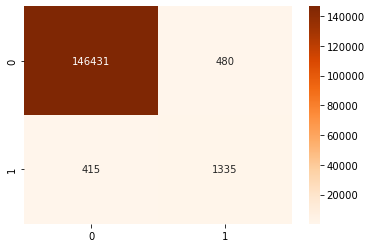

In [31]:
sf.heatmap(cm,annot=True,cmap="Oranges",fmt="d",cbar=True, annot_kws={"size":10})

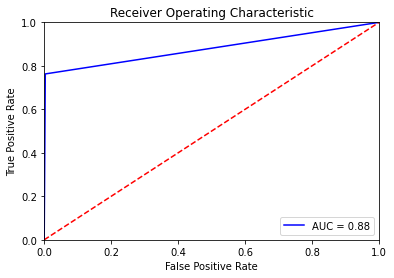

In [32]:
plot_roc_auc(ytest, DT.predict_proba(xtest)[:,1])

In [33]:
from sklearn.linear_model import LogisticRegression

In [34]:
LRG = LogisticRegression()

In [35]:
LRG.fit(xtrain,ytrain)

C:\Users\Asus\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [36]:
lrg_pred = LRG.predict(xtest)

In [37]:
lrg_pred

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [38]:
accuracy_score(ytest,lrg_pred)

0.9934010937636636

In [39]:
confusion_matrix(ytest,lrg_pred)

array([[146751,    160],
       [   821,    929]], dtype=int64)

In [40]:
print(classification_report(ytest,lrg_pred))

              precision    recall  f1-score   support

           0       0.99      1.00      1.00    146911
           1       0.85      0.53      0.65      1750

    accuracy                           0.99    148661
   macro avg       0.92      0.76      0.83    148661
weighted avg       0.99      0.99      0.99    148661



In [78]:
cm = confusion_matrix(ytest,lrg_pred)

<AxesSubplot:>

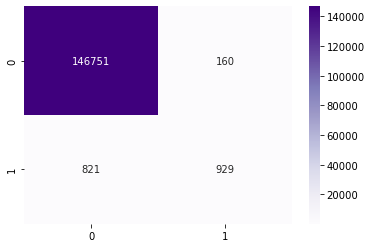

In [79]:
sf.heatmap(cm,annot=True,cmap="Purples",fmt="d",cbar=True, annot_kws={"size":10})

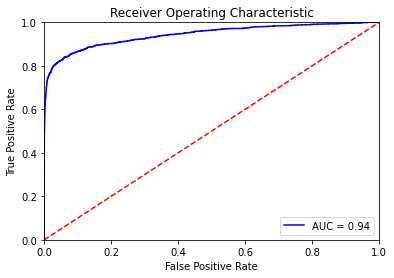

In [43]:
plot_roc_auc(ytest, LRG.predict_proba(xtest)[:,1])

In [44]:
from sklearn.ensemble import RandomForestClassifier

In [45]:
Rf = RandomForestClassifier()

In [46]:
Rf.fit(xtrain,ytrain)

RandomForestClassifier()

In [47]:
rf_pred = Rf.predict(xtest)

In [48]:
rf_pred

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [49]:
accuracy_score(ytest,rf_pred)

0.9960985059968653

In [50]:
confusion_matrix(ytest,rf_pred)

array([[146758,    153],
       [   427,   1323]], dtype=int64)

In [51]:
print(classification_report(ytest,rf_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    146911
           1       0.90      0.76      0.82      1750

    accuracy                           1.00    148661
   macro avg       0.95      0.88      0.91    148661
weighted avg       1.00      1.00      1.00    148661



In [52]:
cm = confusion_matrix(ytest,rf_pred)

<AxesSubplot:>

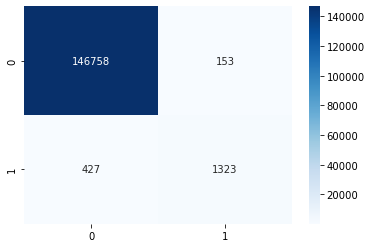

In [53]:
sf.heatmap(cm,annot=True,cmap="Blues",fmt="d",cbar=True, annot_kws={"size":10})

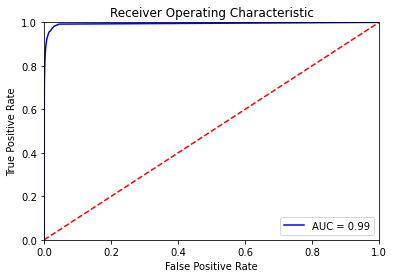

In [54]:
plot_roc_auc(ytest, Rf.predict_proba(xtest)[:,1])

In [55]:
from sklearn.naive_bayes import GaussianNB

In [56]:
GNB = GaussianNB()

In [57]:
GNB.fit(xtrain,ytrain)

GaussianNB()

In [58]:
gnb_pred = GNB.predict(xtest)

In [59]:
gnb_pred

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [60]:
accuracy_score(ytest,gnb_pred)

0.9849388878051406

In [61]:
confusion_matrix(ytest,gnb_pred)

array([[145050,   1861],
       [   378,   1372]], dtype=int64)

In [62]:
print(classification_report(ytest,gnb_pred))

              precision    recall  f1-score   support

           0       1.00      0.99      0.99    146911
           1       0.42      0.78      0.55      1750

    accuracy                           0.98    148661
   macro avg       0.71      0.89      0.77    148661
weighted avg       0.99      0.98      0.99    148661



In [63]:
cm = confusion_matrix(ytest,gnb_pred)

<AxesSubplot:>

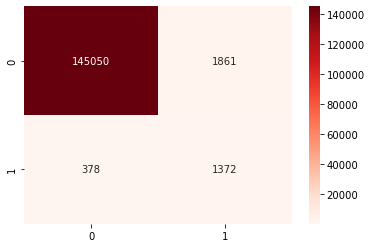

In [64]:
sf.heatmap(cm,annot=True,cmap="Reds",fmt="d",cbar=True, annot_kws={"size":10})

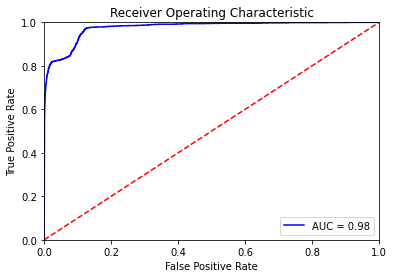

In [65]:
plot_roc_auc(ytest, GNB.predict_proba(xtest)[:,1])

In [66]:
from sklearn.neighbors import KNeighborsClassifier

In [67]:
knn = KNeighborsClassifier(n_neighbors=5,p=1)

In [68]:
knn.fit(xtrain,ytrain)

KNeighborsClassifier(p=1)

In [69]:
knn_pred = knn.predict(xtest)

In [70]:
knn_pred

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [71]:
accuracy_score(ytest,knn_pred)

0.9941813925642906

In [72]:
confusion_matrix(ytest,knn_pred)

array([[146713,    198],
       [   667,   1083]], dtype=int64)

In [73]:
print(classification_report(ytest,knn_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    146911
           1       0.85      0.62      0.71      1750

    accuracy                           0.99    148661
   macro avg       0.92      0.81      0.86    148661
weighted avg       0.99      0.99      0.99    148661



In [74]:
cm = confusion_matrix(ytest,knn_pred)

<AxesSubplot:>

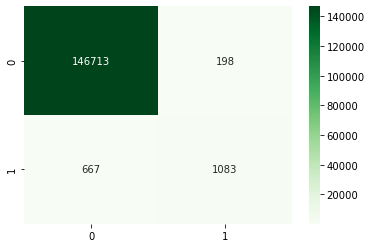

In [75]:
sf.heatmap(cm,annot=True,cmap="Greens",fmt="d",cbar=True, annot_kws={"size":10})

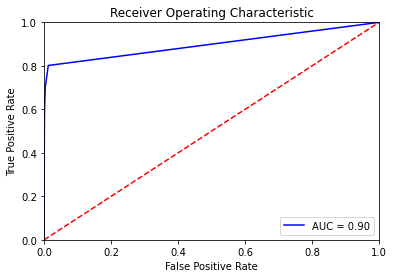

In [76]:
plot_roc_auc(ytest, knn.predict_proba(xtest)[:,1])